# Exploratory Data Analysis
This notebook aims to explore the beer dataset and shortlist the less popular but good quality beers to build a recommender system.

**Prepared by: Group 7**

*Chan Cheah Cha A0189006A, Chua Kai Bing A0185606Y, Goh Jia Yi A0185610J, Lim Jia Qi A0189626M, Tan Zen Wei A0188424X*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Setting paths
root = '/content/gdrive/MyDrive/BT4014/Codes/Data/'

## Exploring the dataset

In [ ]:
beer_df = pd.read_csv(root + 'beer_reviews.csv')
beer_df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [ ]:
beer_df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [ ]:
beer_df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [ ]:
beer_df['beer_beerid'].nunique()
# 66055 different types of beers

66055

In [ ]:
beer_df['review_profilename'].nunique()
# 33387 different users

33387

In [ ]:
beer_df['brewery_id'].nunique()
# 5840 different types of brewery

5840

## Exploring Popularity of beers (by review count)

In [ ]:
# Computing review count of each beer

beer_df['count'] = 1
beer_count = beer_df[['beer_name','count']].groupby('beer_name').sum().sort_values(by=['count'],ascending=False)
beer_count = beer_count.reset_index()

In [ ]:
# Summary stats

beer_count.describe()

,count
count,56857.000000
mean,27.905341
std,122.198636
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,3290.000000


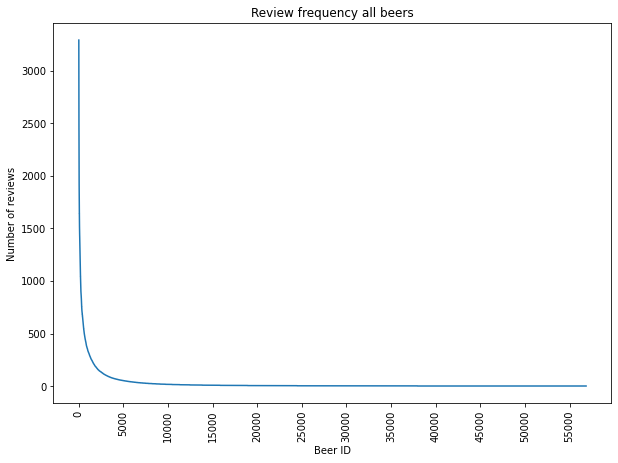

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(beer_count.index,beer_count['count'])
plt.title('Review frequency all beers')
plt.xlabel('Beer ID')
plt.ylabel('Number of reviews')
plt.xticks(np.arange(0, 60000, 5000), rotation='vertical')
plt.show()

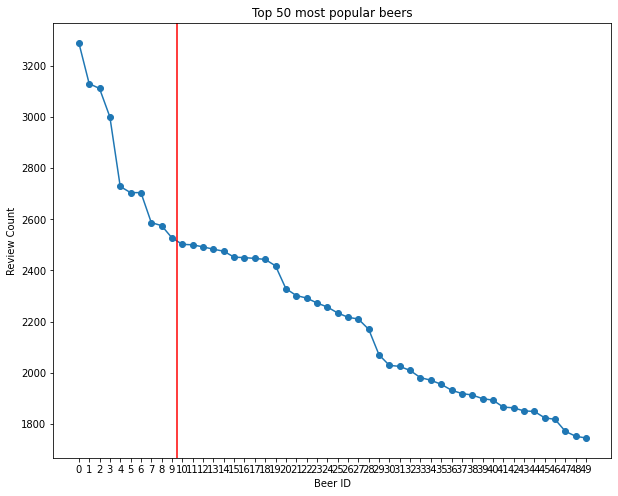

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(beer_count.head(50).index,beer_count.head(50)['count'], marker='o')
plt.title('Top 50 most popular beers')
plt.xlabel('Beer ID')
plt.ylabel('Review Count')
plt.xticks(np.arange(0, 50, 1))
plt.axvline(9.5, 0, 1, c='red')
#plt.axvline(19.5, 0, 1, c='red')
plt.show()

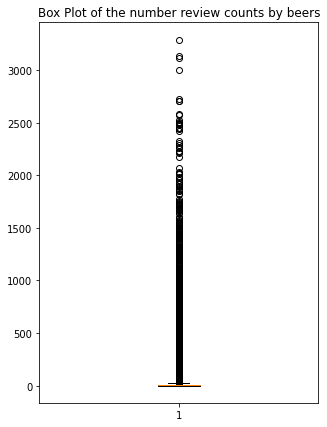

In [ ]:
plt.figure(figsize=(5,7))
plt.boxplot(beer_count['count'])
plt.title('Box Plot of the number review counts by beers')
plt.show()

In [ ]:
# Filter out popular beers (review count > 100) minus top 10
popular_beers = beer_count.loc[beer_count['count']>100]
popular_beers = popular_beers[10:]
popular_beers

,beer_name,count
10,Founders Breakfast Stout,2502
11,Pale Ale,2500
12,Sierra Nevada Bigfoot Barleywine Style Ale,2492
13,La Fin Du Monde,2483
14,60 Minute IPA,2475
...,...,...
3099,River Ale,101
3100,White Ale,101
3101,Joe Coffee Porter,101
3102,Monstre Rouge,101


## Exploring Quality of beers (by average overall ratings)

In [ ]:
# Find out average overall ratings of the beers

beer_reviews = beer_df[['beer_name','review_overall']].groupby('beer_name').mean().sort_values(by=['review_overall'],ascending=False)
beer_reviews = beer_reviews.reset_index()
beer_reviews.rename(columns={'review_overall': 'review_mean'}, inplace=True)  ##rename aggregated col
beer_reviews.head(30)

,beer_name,review_mean
0,Taeberry Boch,5.0
1,Wasatch Irish Stout,5.0
2,"Pale Ale S.C.A.G. (Simcoe, Columbus, Amarillo ...",5.0
3,Distorter Porter,5.0
4,Louwaege's Stout,5.0
5,Belgian Country Pale Ale,5.0
6,Cappy's Cherry Wheat,5.0
7,C. Brown's Pumpkin Ale,5.0
8,John's Mild Bitter,5.0
9,Raspberry Sparkle,5.0


In [ ]:
# Summary stats

beer_reviews.describe()

,review_mean
count,56857.000000
mean,3.654631
std,0.617673
min,1.000000
25%,3.416667
50%,3.750000
75%,4.000000
max,5.000000


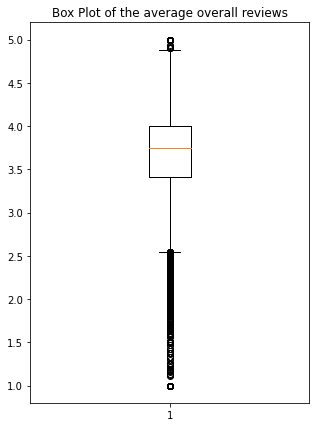

In [ ]:
plt.figure(figsize=(5,7))
plt.boxplot(beer_reviews['review_mean'])
plt.title('Box Plot of the average overall reviews')
plt.show()

In [ ]:
quality_beers = beer_reviews.loc[beer_reviews['review_mean']>4]
quality_beers

,beer_name,review_mean
0,Taeberry Boch,5.000000
1,Wasatch Irish Stout,5.000000
2,"Pale Ale S.C.A.G. (Simcoe, Columbus, Amarillo ...",5.000000
3,Distorter Porter,5.000000
4,Louwaege's Stout,5.000000
...,...,...
11838,Poleeko Gold Pale Ale,4.001701
11839,Wolaver's Oatmeal Stout,4.001462
11840,Corsendonk Agnus / Abbey Pale Ale,4.001116
11841,Bully! Porter,4.001046


## Final Shortlisted beers

In [ ]:
# Join both df

beer_combined = pd.merge(quality_beers, popular_beers, on=["beer_name"])
shortlisted = beer_combined[:100]
shortlisted

,beer_name,review_mean,count
0,Citra DIPA,4.630952,252
1,Cantillon Blåbær Lambik,4.628205,156
2,Heady Topper,4.625800,469
3,Deviation - Bottleworks 9th Anniversary,4.620536,112
4,Trappist Westvleteren 12,4.617925,1272
...,...,...,...
95,Great Lakes Dortmunder Gold,4.295201,896
96,Wet,4.295058,344
97,Ivan The Terrible,4.293532,201
98,Consecration,4.291911,853


In [ ]:
shortlisted.describe()

,review_mean,count
count,100.000000,100.0000
mean,4.390753,622.6900
std,0.091847,650.5884
min,4.288674,103.0000
25%,4.323950,175.2500
50%,4.364329,362.5000
75%,4.432115,743.5000
max,4.630952,2502.0000


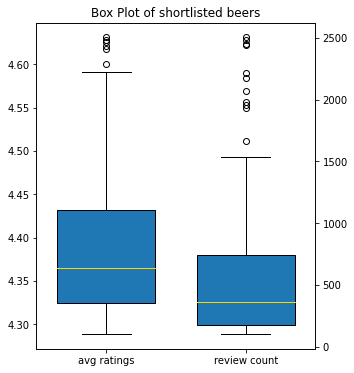

In [ ]:
fig, ax1 = plt.subplots(figsize = (5,6))
# ax.boxplot([shortlisted['review_mean'],shortlisted['count']])

props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="gold"))
box1=ax1.boxplot(shortlisted['review_mean'].values, positions=[0], **props)

ax2 = ax1.twinx()
box2=ax2.boxplot(shortlisted['count'].values,positions=[1], **props)

plt.title('Box Plot of shortlisted beers')
ax1.set_xticklabels(['avg ratings','review count'])

plt.show()